# Joe Gaspari

## Research Question

The advance in vaccine production due to the scale and impact of COVID-19 raises many concerns in the eyes of the gerneral public. This data interests me as this vaccine is being callously viewed by the public as being unsafe, untested or even unproven. The spread of miss information and political factors all impact the public view, leading some populations to show slow inclines of immunization. We hope to visualize the trends in partial and fully vaccinated amongst provinces in hopes to tag key sociopolicial events that may impact the number of individuals who choose to get the vaccine.

## What Does Our Data Hold?

The set loaded from the government of Canada official site holds the reported number of vaccines adminstered to individuals by region. This set spans a total of 39 weeks from the dates 2020/12/19 to 2021/09/11. The set further specifies the number of partially and fully vaccinated along with the probability of an individual being either or. The data includes each vaccine product and holds specific total counts for partially and fully vaccinated. For the purposes of our analysis below we will only be considering the sum total across all vaccine products of fully and partially vaccinated over each week, be

In [49]:
#loading the data set!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import seaborn as sns

pd.set_option('display.max_rows', None)

df = pd.read_csv("../data/raw/vaccination-coverage-byVaccineType.csv")

#Lets look at the current column labels in our dataframe
print(df.columns)
print(len(df.index))
df.isnull().sum()
#Will tell us the number of null or empty spots

Index(['pruid', 'prename', 'prfname', 'week_end', 'product_name',
       'numtotal_atleast1dose', 'numtotal_partially', 'numtotal_fully',
       'prop_atleast1dose', 'prop_partially', 'prop_fully', 'Unnamed: 11',
       'numweekdelta_atleast1dose', 'numweekdelta_fully',
       'propweekdelta_partially', 'propweekdelta_fully'],
      dtype='object')
3295


pruid                           0
prename                         0
prfname                         0
week_end                        0
product_name                    0
numtotal_atleast1dose         165
numtotal_partially            175
numtotal_fully                227
prop_atleast1dose             165
prop_partially                175
prop_fully                    227
Unnamed: 11                  3295
numweekdelta_atleast1dose    3295
numweekdelta_fully           3295
propweekdelta_partially      3295
propweekdelta_fully          3295
dtype: int64

## What To do with NaN?

Since the fields Unnamed: 11, numweekdelta_atleast1dose, numweekdelta_fully, propweekdelta_partially, and propweekdelta_fully are all NaN and can thus can be droped from the set all together. This is identified by the value 3295 which is identical to the value returned from len(df.index). Additonally the prfname column is redundant as this investigation is being conducted in english. 

In [50]:
#We must drop all columns specified
df = (df.drop('Unnamed: 11', 1)
      .drop('numweekdelta_atleast1dose', 1)
      .drop('numweekdelta_fully', 1)
      .drop('propweekdelta_partially', 1)
      .drop('propweekdelta_fully', 1)
      .drop('prfname', 1))

<ipython-input-50-112311ecbb56>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = (df.drop('Unnamed: 11', 1)


In [51]:
#Lets look to see if our changes were implemented properly
# display(df)

## Missing Data 

Now that our dataframe/set has been stripped of unviable columns we can begin searching the data for further blanks or NaN in the data. We can call **df.info()** to give us more information on our data and what kind of domain each attribute lives within (ie. Integer, Object, float) and proceed to impose values into these spots. Since our data can be seen to range from 0 onwards we can safely assign NaN entries a value of 0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pruid                  3295 non-null   int64  
 1   prename                3295 non-null   object 
 2   week_end               3295 non-null   object 
 3   product_name           3295 non-null   object 
 4   numtotal_atleast1dose  3130 non-null   float64
 5   numtotal_partially     3120 non-null   object 
 6   numtotal_fully         3068 non-null   float64
 7   prop_atleast1dose      3130 non-null   object 
 8   prop_partially         3120 non-null   object 
 9   prop_fully             3068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 257.5+ KB


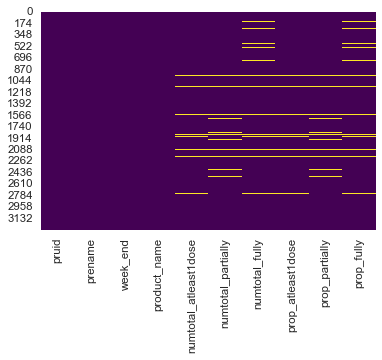

In [52]:
#Lets look at a heat map of our missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
df.info()

## String Literal Complication

When working further within the data we found that not only did the data contain NaN values but incorrectly written 'na' entries which resulted in some of our columns being defined as holding objects, when really all columns {'prop_atleast1dose','prop_partially','prop_fully'} should be float values. The probability columns also contained float values with </> operators placed infront. These greater than or less than operators cause issues as the whole value becomes a string. When we define these mistake and replace it with 0.0 using *df.replace* as seen below. 

In [53]:
#lets fill all the NaN spots with zero, after reviewing the data these empties seem to correspond to zeros or no reported
#data in the field
for col in df.columns:
    df[col].replace({np.nan:0}, inplace=True)
    df[col].replace({'na': 0}, inplace=True)
   


df['prop_atleast1dose'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'')
df['prop_atleast1dose'] = df['prop_atleast1dose'].astype(float)

df['prop_partially'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'')
df['prop_partially'] = df['prop_partially'].astype(float)

df['prop_fully'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'')
df['prop_fully'] = df['prop_fully'].astype(float)

df['numtotal_partially'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'')
df['numtotal_partially'] = df['numtotal_partially'].astype(float)
#Let us see how full our data is now

df.info()
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pruid                  3295 non-null   int64  
 1   prename                3295 non-null   object 
 2   week_end               3295 non-null   object 
 3   product_name           3295 non-null   object 
 4   numtotal_atleast1dose  3295 non-null   float64
 5   numtotal_partially     3295 non-null   float64
 6   numtotal_fully         3295 non-null   float64
 7   prop_atleast1dose      3295 non-null   float64
 8   prop_partially         3295 non-null   float64
 9   prop_fully             3295 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 257.5+ KB


In [54]:
df.nunique()


pruid                      14
prename                    14
week_end                   39
product_name                9
numtotal_atleast1dose    1766
numtotal_partially       1520
numtotal_fully           1367
prop_atleast1dose         983
prop_partially            735
prop_fully                737
dtype: int64

## Df.nunique()

Here we see a break down of all the unique values found within each column in the dataframe. We see there are a total of 14 regions corresponding to each of the 10 provinces, 3 territories, and the country as a whole.

**Week_end**

We see from this feild that there are a total of 39 weeks of data provided in the set. Allowing for us to show some progression over time. 

**Product_name**

Interestingly, upon scanning the data only Pfizer-BioNT was available to the general public. This number thus grows to a total of 6, removing of course Not repoted, Unknown and Other samples. These three unknowns still contain reported data and thus will be considered in the future analysis. 

In [55]:
df['product_name'].unique()

array(['Not reported', 'Pfizer-BioNTech', 'Unknown', 'Moderna',
       'AstraZeneca', 'COVISHIELD', 'Combination', 'Janssen', 'Other'],
      dtype=object)

In [56]:
df['prename'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Nova Scotia', 'Quebec',
       'Manitoba', 'Saskatchewan', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut', 'Prince Edward Island',
       'New Brunswick', 'Alberta', 'Ontario'], dtype=object)

In [57]:
#The date form found in the data is not usable in pandas and as such must be converted to a true date/time
#as shown below
df['week_end'] = df['week_end'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pruid                  3295 non-null   int64         
 1   prename                3295 non-null   object        
 2   week_end               3295 non-null   datetime64[ns]
 3   product_name           3295 non-null   object        
 4   numtotal_atleast1dose  3295 non-null   float64       
 5   numtotal_partially     3295 non-null   float64       
 6   numtotal_fully         3295 non-null   float64       
 7   prop_atleast1dose      3295 non-null   float64       
 8   prop_partially         3295 non-null   float64       
 9   prop_fully             3295 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 257.5+ KB


<AxesSubplot:xlabel='week_end', ylabel='numtotal_fully'>

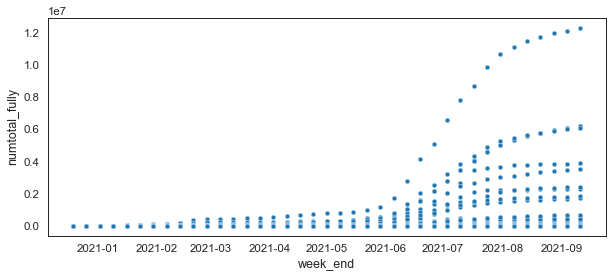

In [58]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="week_end", y="numtotal_fully", data=df)

## Scatter Plot

In the above seaborn scatter plot we see the number of vaccinated with respect to time. We can see from the data that some partioning begins to occur within the region of Canada (pruid=1) when separated from the entire set. Looking further we see this partioning is a result of the different vaccine products that are offered over the duration of the roll out. 

## Wrangle Data

Now that we have a cleaned, full data set, we can begin to separte columns and rows to build smaller groups within the set. Pruid matches each region, thus lets build a data set from each region, over the entire course of the data set with regards to total number of fully vacinnated. Lets then create another data set that holds the same week range, pruid but now with respect to partially vaccinated. We will then over-lay these two plots to show the regions transition from partially to fully vaccinated and when that began to occur. We can also see which provinces or regions were slowest to begin the process of immunization. 

## Bar Graph 1.1

In the bar graph below we see each week represented as a digit in range 0-38. The sample data ranges over a 39 week period, this is confirmed when calling **df.nunique()** which tells us that there are 39 unique date-time stamps in the week_end column. Just as a reference we took the data set and refined the results to include only tuples with pruid = 1 and then summed the indivdual counts for each product across each region based on the week with respect to the count of fully vaccinated.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38')]

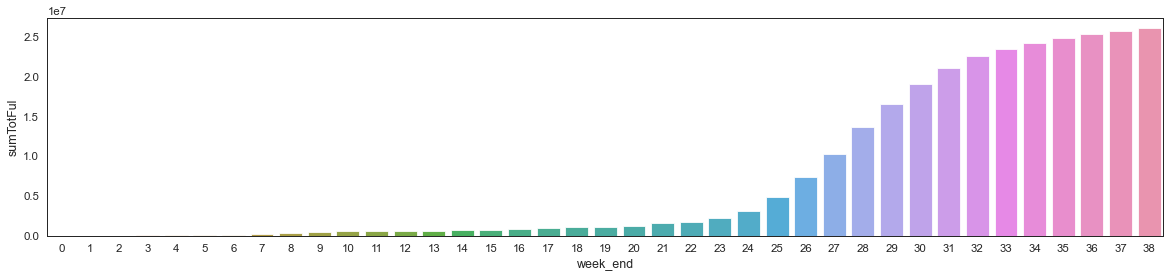

In [59]:
newdf = df[(df.pruid == 1)]
new1 = newdf.groupby("week_end")["numtotal_fully"].sum().to_frame(name = 'sumTotFul').reset_index()

sns.set_style('white')
plt.figure(figsize=(20,4))
sns.set_context('paper', font_scale=1.3)             
sns.barplot(x='week_end', y='sumTotFul', data=new1).set_xticklabels(range(len(new1.index)))

Text(0, 0.5, 'FullyVacced')

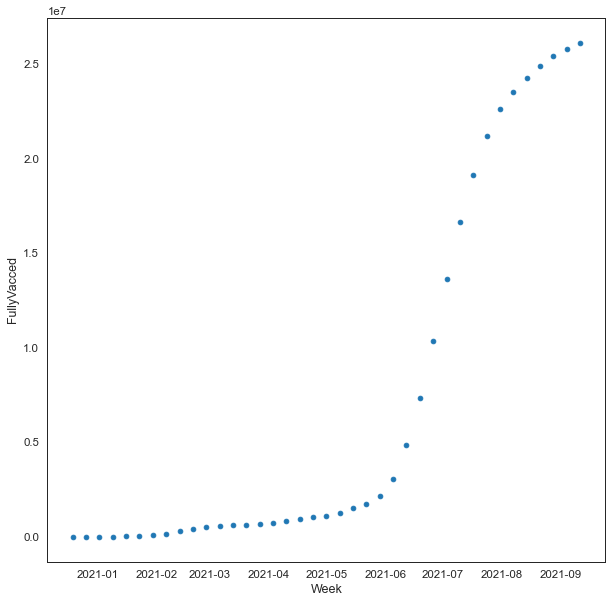

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(x='week_end',y='sumTotFul',data=new1)
plt.xlabel('Week')
plt.ylabel('FullyVacced')

## Bar Graph 1.2

In the bar graph below we see each week represented as a digit in range 0-38. Just as a reference we took the data set and refined the results to include only tuples with pruid = 1 and then summed the indivdual counts for each product across each region based on the week with respect to the count of partially vaccinated.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38')]

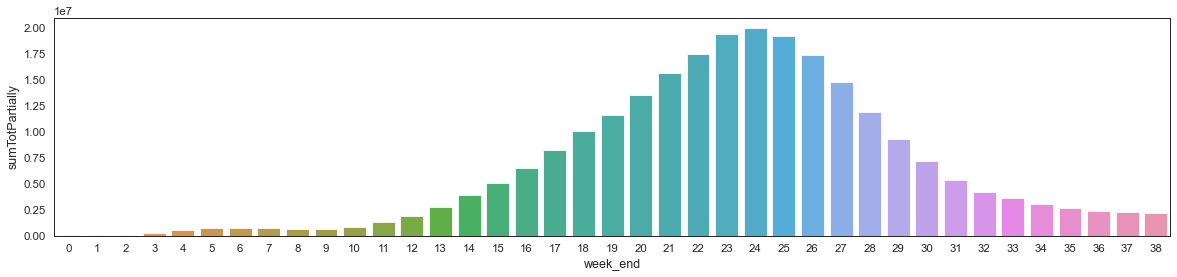

In [61]:
new2 = newdf.groupby("week_end")["numtotal_partially"].sum().to_frame(name = 'sumTotPartially').reset_index()

sns.set_style('white')
plt.figure(figsize=(20,4))
sns.set_context('paper', font_scale=1.3)             
sns.barplot(x='week_end', y='sumTotPartially', data=new2).set_xticklabels(range(len(new2.index)))

## What Data Do We Need?

Since our focus is centered around the trends of immunization we want to look at the changes between partially and fully vaccinated over each reporting week, with regards to the region. 

Our above two graphs should be combined as a line graph to show the relative distributions. We can do this by merging the two newly created new1 & new2 dataframe on the week_end column as the key. *dff* becomes the new dataframe holding both distributions.

,week_end,sumTotFul,sumTotPartially
0,2020-12-19,0.0,12362.0
1,2020-12-26,0.0,46156.0
2,2021-01-02,0.0,82512.0
3,2021-01-09,4521.0,212824.0
4,2021-01-16,26748.0,538173.0
5,2021-01-23,59294.0,716208.0
6,2021-01-30,113649.0,745593.0
7,2021-02-06,173779.0,727626.0
8,2021-02-13,307369.0,665699.0
9,2021-02-20,435267.0,651320.0


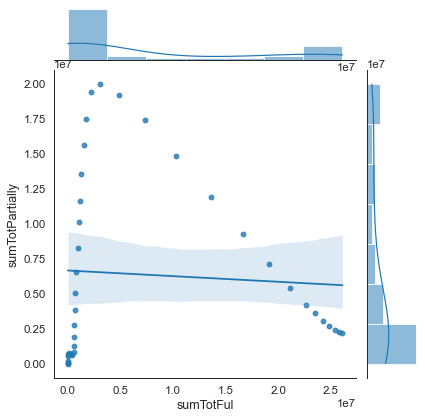

In [62]:
# display(new1 & new2 merge on week_end)
dff = pd.merge(new1, new2, on='week_end', how ='inner')
display(dff)
sns.jointplot(x='sumTotFul', y='sumTotPartially', data=dff, kind='reg')

## Using Relative Import

Below we begin to display the simple functionality of the methods built in project_functions1. These methods are described in detail and allow us to visualize the trends 

In [76]:
# import project_functions1 as pf

def popDict(reg1):
    di = {'Canada':38246108, 'Newfoundland and Labrador':520553, 'Nova Scotia':992055, 'Quebec':8604495,
       'Manitoba':1383765, 'Saskatchewan':1179844, 'British Columbia':5214805, 'Yukon':42986,
      'Northwest Territories':45504, 'Nunavut':39403, 'Prince Edward Island':164318,
       'New Brunswick':789225, 'Alberta':4442879, 'Ontario':14826276}
    return di[reg1]


df7 = pf.load_and_process("../data/raw/vaccination-coverage-byVaccineType.csv")

regionid = df7['pruid'].unique()

print(regionid)


app_data = []

for e in regionid:
    dfq = pf.databyRegion(df7, e)
    #We use this to get the region
    reg = str(pf.region(e))
    #we use popdict to get our population value
    pop = popDict(reg)
    dfq['NPart'] = (dfq['sumTotPartially']/pop)*100
    dfq['NFully'] = (dfq['sumTotFul']/pop)*100
    display(dfq)
#     print(pop)
    app_data.append(dfq)

#     display(pf.viscompar(dfq, e))
#     display(pf.showRelationship(dfq))

app_data = pd.concat(app_data)


app_data.to_csv(f'../data/processed/JoeProcessed/normalized.csv')




/Users/joegaspari/Documents/Documents/Year2/S1/DATA 301/GroupProj/project-projectgroup-48/notebooks/project_functions1.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = ( pd.read_csv(url_path)


[ 1 10 12 24 46 47 59 60 61 62 11 13 48 35]


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Canada,0.0,12362.0,0.032322,0.000000
1,2020-12-26,Canada,0.0,46156.0,0.120682,0.000000
2,2021-01-02,Canada,0.0,82512.0,0.215740,0.000000
3,2021-01-09,Canada,4521.0,212824.0,0.556459,0.011821
4,2021-01-16,Canada,26748.0,538173.0,1.407131,0.069937
5,2021-01-23,Canada,59294.0,716208.0,1.872630,0.155033
6,2021-01-30,Canada,113649.0,745593.0,1.949461,0.297152
7,2021-02-06,Canada,173779.0,727626.0,1.902484,0.454370
8,2021-02-13,Canada,307369.0,665699.0,1.740567,0.803661
9,2021-02-20,Canada,435267.0,651320.0,1.702971,1.138069


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Newfoundland and Labrador,0.0,972.0,0.186725,0.000000
1,2020-12-26,Newfoundland and Labrador,0.0,1785.0,0.342905,0.000000
2,2021-01-02,Newfoundland and Labrador,0.0,1785.0,0.342905,0.000000
3,2021-01-09,Newfoundland and Labrador,853.0,1994.0,0.383054,0.163864
4,2021-01-16,Newfoundland and Labrador,1734.0,2516.0,0.483332,0.333107
5,2021-01-23,Newfoundland and Labrador,1737.0,5711.0,1.097103,0.333684
6,2021-01-30,Newfoundland and Labrador,2762.0,5591.0,1.074050,0.530590
7,2021-02-06,Newfoundland and Labrador,4068.0,4822.0,0.926323,0.781477
8,2021-02-13,Newfoundland and Labrador,5449.0,4343.0,0.834305,1.046771
9,2021-02-20,Newfoundland and Labrador,6112.0,4324.0,0.830655,1.174136


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Nova Scotia,0.0,1092.0,0.110075,0.000000
1,2020-12-26,Nova Scotia,0.0,2218.0,0.223576,0.000000
2,2021-01-02,Nova Scotia,0.0,2720.0,0.274178,0.000000
3,2021-01-09,Nova Scotia,1076.0,1679.0,0.169245,0.108462
4,2021-01-16,Nova Scotia,2207.0,3533.0,0.356129,0.222468
5,2021-01-23,Nova Scotia,2708.0,5580.0,0.562469,0.272969
6,2021-01-30,Nova Scotia,2729.0,9361.0,0.943597,0.275086
7,2021-02-06,Nova Scotia,5133.0,7716.0,0.777779,0.517411
8,2021-02-13,Nova Scotia,8039.0,6688.0,0.674156,0.810338
9,2021-02-20,Nova Scotia,8225.0,6690.0,0.674358,0.829087


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Quebec,0.0,4728.0,0.054948,0.000000
1,2020-12-26,Quebec,0.0,17216.0,0.200081,0.000000
2,2021-01-02,Quebec,0.0,28305.0,0.328956,0.000000
3,2021-01-09,Quebec,0.0,83278.0,0.967843,0.000000
4,2021-01-16,Quebec,0.0,145783.0,1.694266,0.000000
5,2021-01-23,Quebec,0.0,218827.0,2.543171,0.000000
6,2021-01-30,Quebec,0.0,239485.0,2.783255,0.000000
7,2021-02-06,Quebec,0.0,257501.0,2.992634,0.000000
8,2021-02-13,Quebec,0.0,293734.0,3.413727,0.000000
9,2021-02-20,Quebec,0.0,345979.0,4.020910,0.000000


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Manitoba,0.0,894.0,0.064606,0.000000
1,2020-12-26,Manitoba,0.0,2177.0,0.157324,0.000000
2,2021-01-02,Manitoba,0.0,3432.0,0.248019,0.000000
3,2021-01-09,Manitoba,880.0,7814.0,0.564691,0.063595
4,2021-01-16,Manitoba,2144.0,14355.0,1.037387,0.154940
5,2021-01-23,Manitoba,3396.0,22443.0,1.621879,0.245417
6,2021-01-30,Manitoba,8503.0,23938.0,1.729918,0.614483
7,2021-02-06,Manitoba,13643.0,19998.0,1.445188,0.985933
8,2021-02-13,Manitoba,20406.0,14442.0,1.043674,1.474672
9,2021-02-20,Manitoba,25197.0,11082.0,0.800859,1.820902


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Saskatchewan,0.0,1042.0,0.088317,0.000000
1,2020-12-26,Saskatchewan,0.0,1769.0,0.149935,0.000000
2,2021-01-02,Saskatchewan,0.0,3540.0,0.300040,0.000000
3,2021-01-09,Saskatchewan,953.0,4563.0,0.386746,0.080773
4,2021-01-16,Saskatchewan,1732.0,12551.0,1.063785,0.146799
5,2021-01-23,Saskatchewan,2458.0,21205.0,1.797272,0.208333
6,2021-01-30,Saskatchewan,3072.0,24143.0,2.046287,0.260373
7,2021-02-06,Saskatchewan,5394.0,24353.0,2.064086,0.457179
8,2021-02-13,Saskatchewan,9545.0,23322.0,1.976702,0.809005
9,2021-02-20,Saskatchewan,15960.0,21804.0,1.848041,1.352721


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,British Columbia,0.0,3634.0,0.069686,0.000000
1,2020-12-26,British Columbia,0.0,12447.0,0.238686,0.000000
2,2021-01-02,British Columbia,0.0,24670.0,0.473076,0.000000
3,2021-01-09,British Columbia,35.0,60180.0,1.154022,0.000671
4,2021-01-16,British Columbia,47.0,89668.0,1.719489,0.000901
5,2021-01-23,British Columbia,3360.0,114792.0,2.201271,0.064432
6,2021-01-30,British Columbia,4592.0,130911.0,2.510372,0.088057
7,2021-02-06,British Columbia,12128.0,130874.0,2.509662,0.232569
8,2021-02-13,British Columbia,22634.0,126556.0,2.426860,0.434033
9,2021-02-20,British Columbia,55218.0,109031.0,2.090797,1.058870


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Yukon,0.0,0.0,0.000000,0.000000
1,2020-12-26,Yukon,0.0,0.0,0.000000,0.000000
2,2021-01-02,Yukon,0.0,0.0,0.000000,0.000000
3,2021-01-09,Yukon,0.0,495.0,1.151538,0.000000
4,2021-01-16,Yukon,0.0,1309.0,3.045177,0.000000
5,2021-01-23,Yukon,0.0,3950.0,9.189038,0.000000
6,2021-01-30,Yukon,0.0,7355.0,17.110222,0.000000
7,2021-02-06,Yukon,479.0,9968.0,23.188945,1.114316
8,2021-02-13,Yukon,867.0,9657.0,22.465454,2.016936
9,2021-02-20,Yukon,1090.0,9523.0,22.153724,2.535709


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Northwest Territories,0.0,0.0,0.000000,0.000000
1,2020-12-26,Northwest Territories,0.0,0.0,0.000000,0.000000
2,2021-01-02,Northwest Territories,0.0,122.0,0.268108,0.000000
3,2021-01-09,Northwest Territories,0.0,511.0,1.122978,0.000000
4,2021-01-16,Northwest Territories,0.0,1891.0,4.155679,0.000000
5,2021-01-23,Northwest Territories,0.0,9471.0,20.813555,0.000000
6,2021-01-30,Northwest Territories,118.0,12115.0,26.624033,0.259318
7,2021-02-06,Northwest Territories,299.0,12531.0,27.538238,0.657085
8,2021-02-13,Northwest Territories,579.0,12996.0,28.560127,1.272416
9,2021-02-20,Northwest Territories,1934.0,12583.0,27.652514,4.250176


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-19,Nunavut,0.0,0.0,0.000000,0.000000
1,2020-12-26,Nunavut,0.0,0.0,0.000000,0.000000
2,2021-01-02,Nunavut,0.0,0.0,0.000000,0.000000
3,2021-01-09,Nunavut,0.0,20.0,0.050758,0.000000
4,2021-01-16,Nunavut,0.0,2141.0,5.433596,0.000000
5,2021-01-23,Nunavut,0.0,4448.0,11.288481,0.000000
6,2021-01-30,Nunavut,0.0,5464.0,13.866964,0.000000
7,2021-02-06,Nunavut,286.0,5552.0,14.090298,0.725833
8,2021-02-13,Nunavut,2134.0,4362.0,11.070223,5.415831
9,2021-02-20,Nunavut,4107.0,2866.0,7.273558,10.423064


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-26,Prince Edward Island,0.0,1146.0,0.697428,0.000000
1,2021-01-02,Prince Edward Island,0.0,1669.0,1.015713,0.000000
2,2021-01-09,Prince Edward Island,0.0,2475.0,1.506226,0.000000
3,2021-01-16,Prince Edward Island,1387.0,2906.0,1.768522,0.844095
4,2021-01-23,Prince Edward Island,1884.0,3327.0,2.024733,1.146557
5,2021-01-30,Prince Edward Island,2565.0,2714.0,1.651675,1.560998
6,2021-02-06,Prince Edward Island,3513.0,1789.0,1.088743,2.137928
7,2021-02-13,Prince Edward Island,4893.0,797.0,0.485035,2.977763
8,2021-02-20,Prince Edward Island,5156.0,1294.0,0.787497,3.137818
9,2021-02-27,Prince Edward Island,5212.0,2151.0,1.309047,3.171898


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-26,New Brunswick,0.0,2606.0,0.330197,0.000000
1,2021-01-02,New Brunswick,0.0,2886.0,0.365675,0.000000
2,2021-01-09,New Brunswick,0.0,6241.0,0.790776,0.000000
3,2021-01-16,New Brunswick,2565.0,5353.0,0.678260,0.325002
4,2021-01-23,New Brunswick,2841.0,8675.0,1.099180,0.359973
5,2021-01-30,New Brunswick,4465.0,8326.0,1.054959,0.565745
6,2021-02-06,New Brunswick,5413.0,7837.0,0.992999,0.685863
7,2021-02-13,New Brunswick,7498.0,6148.0,0.778992,0.950046
8,2021-02-20,New Brunswick,11027.0,4234.0,0.536476,1.397193
9,2021-02-27,New Brunswick,12132.0,9544.0,1.209288,1.537204


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2020-12-26,Alberta,0.0,4792.0,0.107858,0.000000
1,2021-01-02,Alberta,0.0,13383.0,0.301224,0.000000
2,2021-01-09,Alberta,724.0,43574.0,0.980760,0.016296
3,2021-01-16,Alberta,4075.0,77784.0,1.750757,0.091720
4,2021-01-23,Alberta,9469.0,80088.0,1.802615,0.213128
5,2021-01-30,Alberta,15994.0,74244.0,1.671079,0.359992
6,2021-02-06,Alberta,21679.0,68989.0,1.552799,0.487949
7,2021-02-13,Alberta,50682.0,44314.0,0.997416,1.140747
8,2021-02-20,Alberta,66188.0,37048.0,0.833874,1.489755
9,2021-02-27,Alberta,87407.0,52554.0,1.182882,1.967350


,week_end,Region,sumTotFul,sumTotPartially,NPart,NFully
0,2021-01-16,Ontario,10857.0,178383.0,1.203154,0.073228
1,2021-01-23,Ontario,31441.0,217691.0,1.468278,0.212063
2,2021-01-30,Ontario,68849.0,201946.0,1.362082,0.464371
3,2021-02-06,Ontario,101744.0,175696.0,1.185031,0.686241
4,2021-02-13,Ontario,174643.0,118340.0,0.798178,1.177929
5,2021-02-20,Ontario,235053.0,84862.0,0.572376,1.585381
6,2021-02-27,Ontario,261923.0,163239.0,1.101011,1.766614
7,2021-03-06,Ontario,271832.0,347483.0,2.343697,1.833448
8,2021-03-13,Ontario,285667.0,589270.0,3.974498,1.926762
9,2021-03-20,Ontario,298415.0,927042.0,6.252696,2.012744


## Analysis 

Based on the data we will revise our research question as additional data linked to politcal events related to COVID-19 was not available. Thus we will present our findings surrounding our new question. With the rise in COVID-19 fatalities and the incresed pressure on the medical systems within each province which provinces were slowest to rise, the question being which region within Canada had the fastest conversion from partially to fully vaccinated.

We will do this by examining each Region's fully and partially vacinated with respect to week


When examinin gthe graphs from above it can be seen that Alberta, and New Brunswick show the slowest rise in partially vacinnated. And have the slowest conversion from partial to fully. 

Due to the small remote populations in the Northwest Territories, Yukon and Nunavut we see a very similar trend amongst all three suggesting the government was concerned about the spread within these small communities and their inability to access health care as easily.

## Newfoundland and Labrador

The reporting periods between these dates: 2021-06-05 - 2021-07-31 were not made available from the province. 

Although from the first graph we can see a linear relationship between partial and fully vaccinated. 



,week_end,sumTotFul,sumTotPartially
0,2020-12-19,0.0,972.0
1,2020-12-26,0.0,1785.0
2,2021-01-02,0.0,1785.0
3,2021-01-09,853.0,1994.0
4,2021-01-16,1734.0,2516.0
5,2021-01-23,1737.0,5711.0
6,2021-01-30,2762.0,5591.0
7,2021-02-06,4068.0,4822.0
8,2021-02-13,5449.0,4343.0
9,2021-02-20,6112.0,4324.0


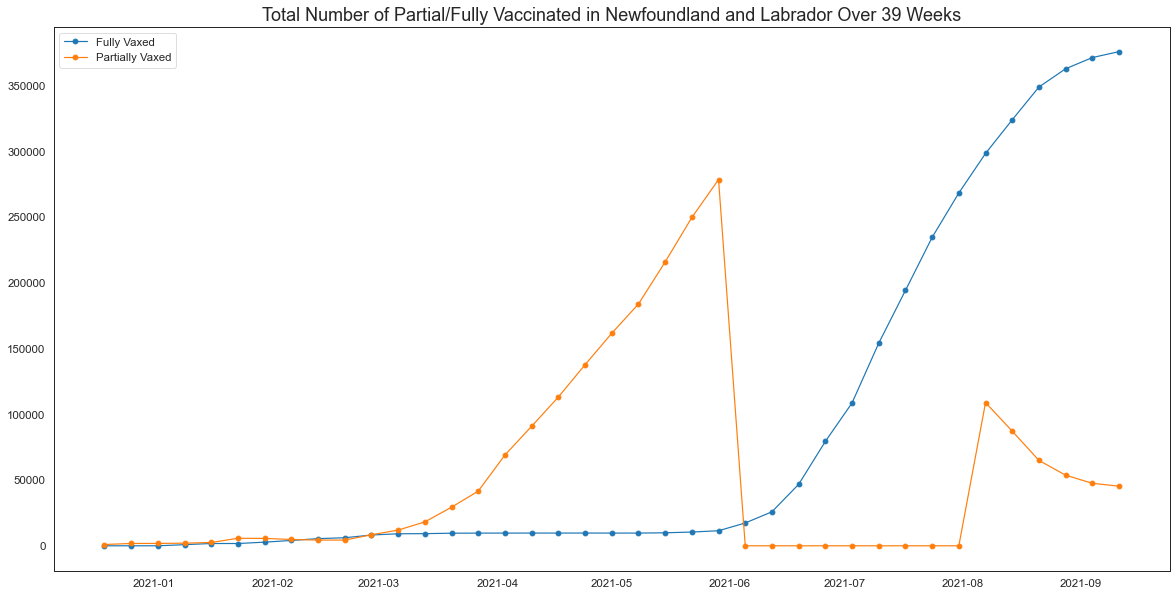

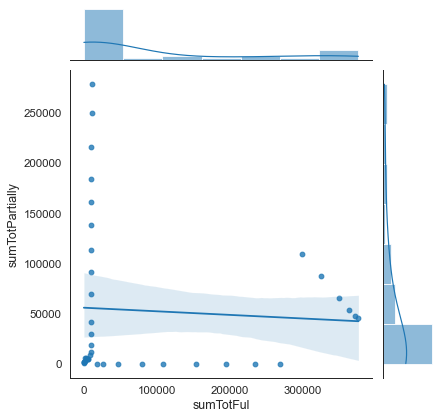

In [16]:
NewLab = pf.databyRegion(df7, 10)
pf.viscompar(NewLab, 10)
pf.showRelationship(NewLab)
display(NewLab)

In [19]:

maxx = pf.findMaxFully(df7)
maxxp = pf.findMaxPartial(df7)
display(maxxp)
maxxp.info()
maxxp.to_csv('../data/processed/JoeProcessed/maxWeeks_part.csv')

display(maxx)
maxx.info()
maxx.to_csv('../data/processed/JoeProcessed/maxWeeks_fully.csv')

,Region,Week,NumPartially
0,Canada,2021-06-05,19960756.0
1,Newfoundland and Labrador,2021-05-29,278592.0
2,Nova Scotia,2021-06-19,604630.0
3,Quebec,2021-06-05,4815864.0
4,Manitoba,2021-06-05,639752.0
5,Saskatchewan,2021-05-29,559140.0
6,British Columbia,2021-06-05,2991745.0
7,Yukon,2021-03-27,12268.0
8,Northwest Territories,2021-02-13,12996.0
9,Nunavut,2021-03-27,6284.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Region        14 non-null     object        
 1   Week          14 non-null     datetime64[ns]
 2   NumPartially  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 464.0+ bytes


,Region,Week,NumFully
0,Canada,2021-09-11,26117524.0
1,Newfoundland and Labrador,2021-09-11,375906.0
2,Nova Scotia,2021-09-11,704444.0
3,Quebec,2021-09-11,6193860.0
4,Manitoba,2021-09-11,940002.0
5,Saskatchewan,2021-09-11,701956.0
6,British Columbia,2021-09-11,3621544.0
7,Yukon,2021-09-11,30880.0
8,Northwest Territories,2021-09-11,27612.0
9,Nunavut,2021-09-11,21124.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Region    14 non-null     object        
 1   Week      14 non-null     datetime64[ns]
 2   NumFully  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 464.0+ bytes


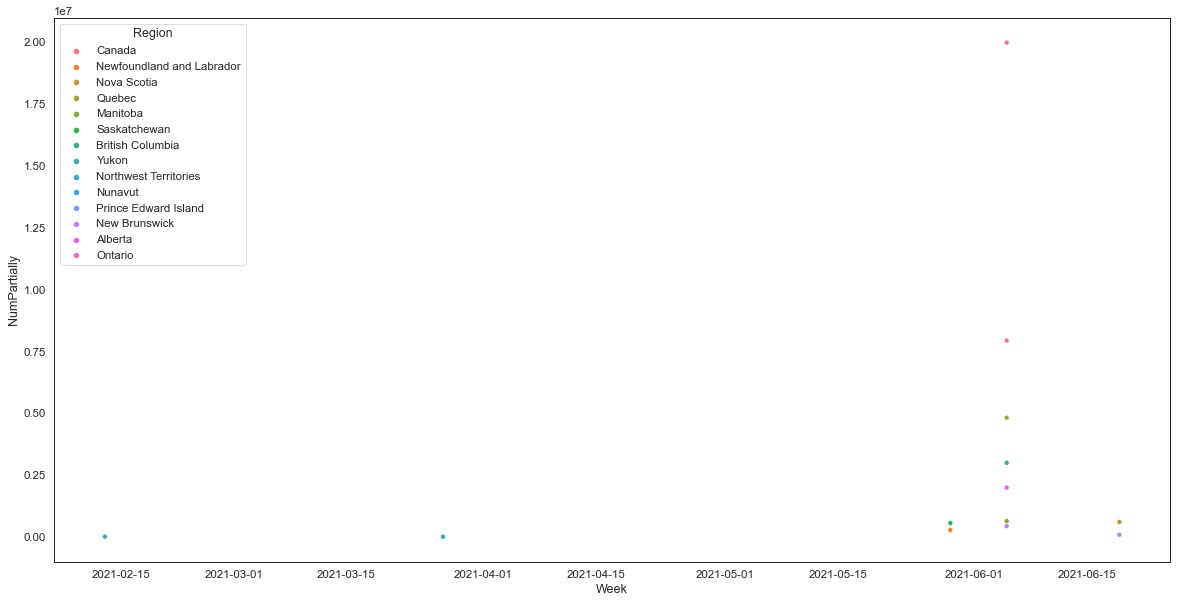

In [72]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=maxxp, x="Week", y="NumPartially", hue='Region')
plt.show()

Above we see that the three light blue color points all correspond to the Northwest Territories, Nunavut and the Yukon suggesting they had the earliest availablity to the vaccine rollout. 

# Adding Population Data

Population data provided by the government of Canada Public Domain CC0 license. The data can be found at this link here https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901

We will use the population to gain perspective around the relative number of the population who is partially or fully vaccinated

Postcensal estimates are based on the 2016 Census counts adjusted for census net undercoverage (CNU) (including adjustment for incompletely enumerated Indian reserves (IEIR)) and the components of demographic growth that occurred since that census. Intercensal estimates are produced using counts from two consecutive censuses adjusted for CNU (including IEIR) and postcensal estimates.
Population estimates: Q1 = January 1; Q2 = April 1; Q3 = July 1; Q4 = October 1.
Estimates are final intercensal and unadjusted for census net undercoverage prior to July 1, 1971. Estimates are final intercensal from July 1, 1971 to April 1, 2016, final postcensal from July 1, 2016 to July 1, 2019, updated postcensal from October 1, 2019 to April 1, 2021 and preliminary postcensal from July 1, 2021.

Statistics Canada. Table 17-10-0009-01  Population estimates, quarterly

In [65]:
popdat = pd.read_csv("../data/raw/QuartPopData.csv", thousands=',').drop('Geography', 1)

da1 = pd.read_csv("../data/raw/QuartPopData.csv", thousands=',')

stdPop = pd.DataFrame(popdat.std(axis=1), columns=['Standard Deviation'])
meanPop = pd.DataFrame(popdat.mean(axis=1), columns=['Mean 20/21'])

ddd = da1.merge(meanPop, left_index=True, right_index=True).merge(stdPop,  left_index=True, right_index=True)
#ddd now contains the mean and std of each row or each region
ddd.to_csv('../data/processed/JoeProcessed/CanRegPop.csv')




<ipython-input-65-dbca6b4ab205>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  popdat = pd.read_csv("../data/raw/QuartPopData.csv", thousands=',').drop('Geography', 1)


In [45]:
print(popdat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q3_2020  14 non-null     int64
 1   Q4_2020  14 non-null     int64
 2   Q1_2021  14 non-null     int64
 3   Q2_2021  14 non-null     int64
 4   Q3_2021  14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes
None


# Normalize to population 

Since the vast majority of Canada's population resides in both British Columbia and Ontario we must normalize our values thus we will assign a percentage to the number of partially and fully given the population size. 


In [68]:
lisa = meanPop['Mean 20/21'].to_list()
display(

[38107681.8, 520293.6, 162231.8, 984656.8, 785132.2, 8585764.0, 14773601.2, 1381991.4, 1179318.6, 4431538.2, 5176005.8, 42478.0, 45418.6, 39251.6]
